In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import f1_score

from time import time

#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')


In [2]:
db = pd.read_csv("Social_Network_Ads.csv")

In [3]:
db.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
db.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
db.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
db.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# Exploratory data analysis

In [7]:
db['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

### remove skewness from dataset by using feature transformation

In [8]:
print('Skewness: %f' % db['EstimatedSalary'].skew())
print('Kurtsis: %f' %db['EstimatedSalary'].kurt())

Skewness: 0.495024
Kurtsis: -0.405878


Text(0.5, 0, 'Log-EstimatedSalary')

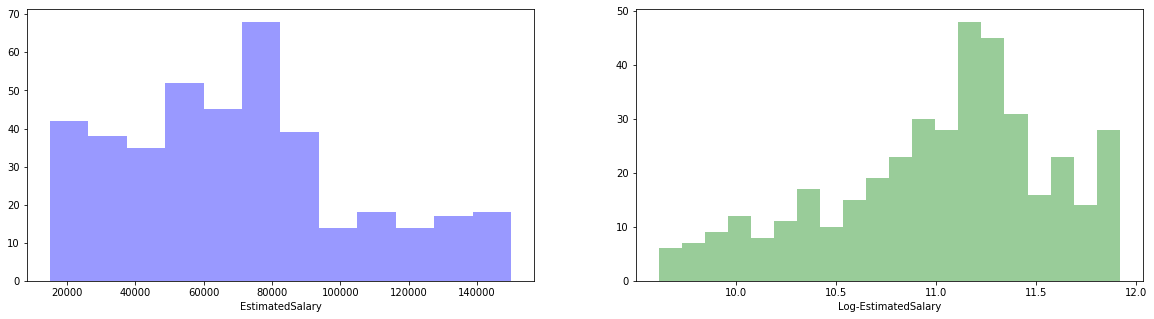

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.EstimatedSalary, ax=ax[0], kde=False, color="blue")
sns.distplot(np.log(db.EstimatedSalary), ax=ax[1], bins=20, color="green", kde=False)
ax[1].set_xlabel("Log-EstimatedSalary")

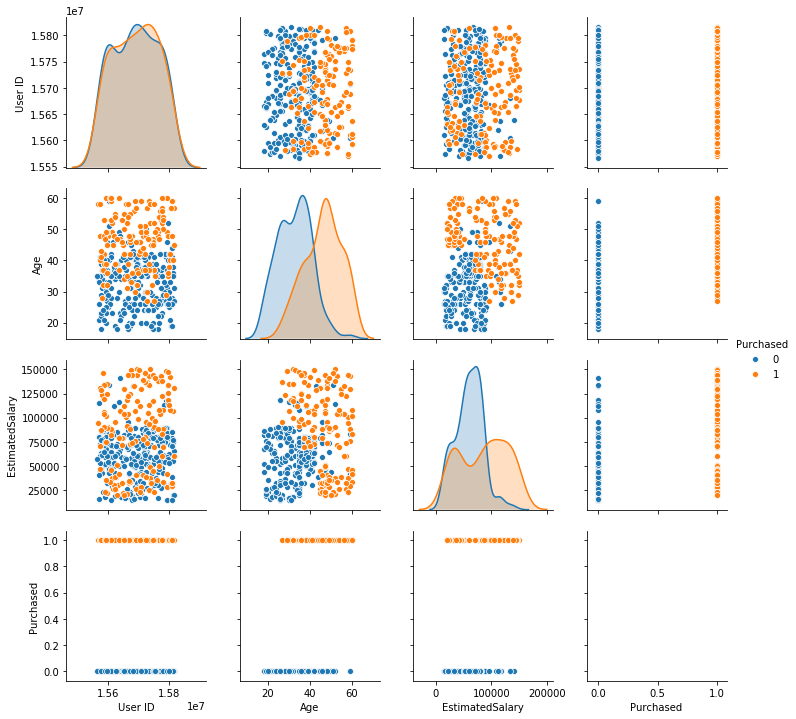

In [10]:
sns.pairplot(db, hue='Purchased') 
plt.show()

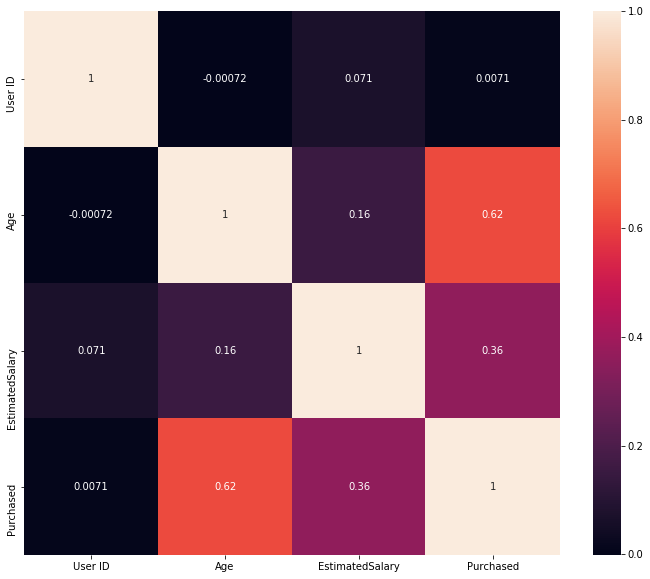

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(),annot=True)

In [12]:
db.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


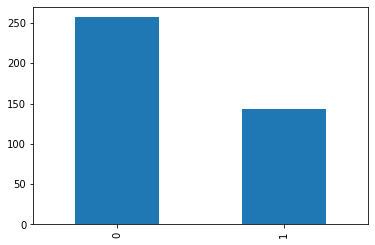

In [13]:
db['Purchased'].value_counts().plot.bar()

<Figure size 720x720 with 0 Axes>

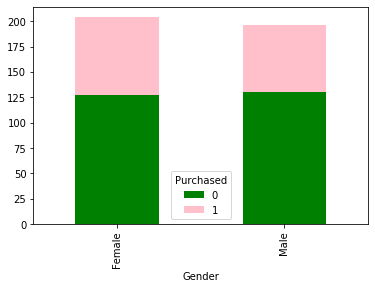

In [14]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['Gender'],db['Purchased'])
dfq.plot(kind='bar', stacked= True ,color =['green','pink'],grid=False)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
db['Gender']=le.fit_transform(db['Gender'])

In [16]:
db.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [17]:
X=db.drop('Purchased',1)
y=db['Purchased']

In [18]:
X.shape

(400, 4)

# modeling

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# KernelPCA

In [55]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf') 

In [56]:
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
# fit the model to the training data (learn the coefficients)
logreg.fit(X_train, Y_train)
# make predictions on the testing set
y_pred = logreg.predict(X_test)
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.7825


In [58]:
import math
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import confusion_matrix
from sklearn.metrics.classification import classification_report 

In [59]:
y_pred = logreg.predict(X_test)
print("Accuracy:")
print(accuracy_score(Y_test, y_pred ))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred ))
print("Classification Report:")
print(classification_report(Y_test, y_pred ))

Accuracy:
0.925
Confusion Matrix:
[[57  1]
 [ 5 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [60]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
    
                 
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

 The best score across ALL searched params:
 0.6254171301446052

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

 The train_accuracy across ALL models:
 0.8375

 The test_accuracy across ALL models:
 0.7625

 The train_confusion matrix across ALL models:
 [[172  27]
 [ 25  96]]

 Th

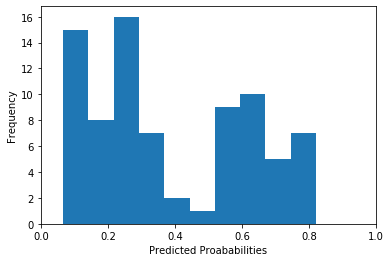

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.5954487989886221

 The best parameters across ALL searched params:
 {'learning_rate': 0

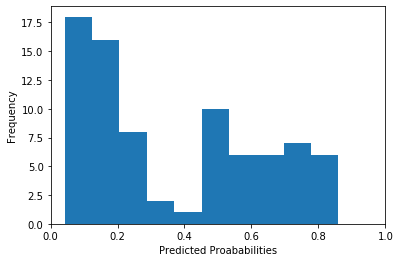

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.6382575757575758

 The best parameters across ALL searched params:
 {'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 0.778125

 The test_accuracy across ALL models:
 0.7375

 The train

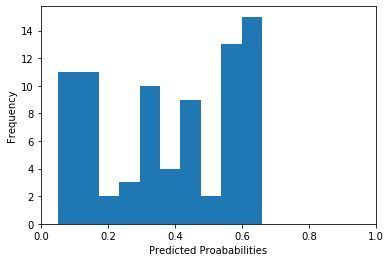

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.5648370497427102

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}

 The train_accuracy across ALL models:
 0.74375

 The test_accuracy across ALL models:
 0.775

 The train_confusion matrix across ALL models:
 [[168  31]
 [ 51  70]]

 The test_confusion matrix across ALL models:
 [[47 11]
 [ 7 15]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.58      0.68      0.62        22



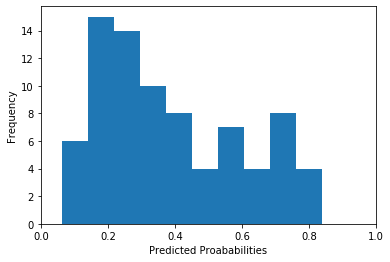

None



In [61]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test_kpca, Y_test,X_train_kpca,Y_train,parameters[i])

#### the best score get from XGBoost model as comapre to other model.

### bar plot of features importances

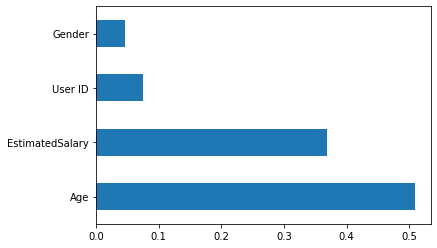

In [20]:
from xgboost import XGBClassifier
model =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

from above fig ,we can see that the 'age' feature is more imporatnt for model.

## save model

In [21]:
import pickle

In [22]:
filename='Social_Network_Ads-intervention_XGBClassifier_model.sav'

In [23]:
pickle.dump(model, open(filename, 'wb'))

In [24]:
load_lr_model =pickle.load(open(filename, 'rb'))